
## Teste RELIABLE/Montalegre

### Dados:

Censos 2011 - Importação dos principais dados alfanuméricos e geográficos (BGRI): http://mapas.ine.pt/download/index2011.phtml 

Indice Vulnarabilidade ("ICARO", por freguesua): CSV enviado (INSA/Ricardo Jorge)

### Libraries

In [72]:
import numpy as np
import pandas as pd
import shapefile as shp
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#this will not be used for now
df = pd.read_csv("/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#tive que mudar encoding
df.head()

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,N_IND_RESID_DESEMP_PROC_EMPRG,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,Unnamed: 127
0,2011,'PT,PT,1,Total Nacional,3544389,3219791,1946604,542393,730794,...,539870,4361187,2339094,3966482,133386,1154709,3073092,1773245,2860521,NaN
1,2011,'1,Continente,2,NUT1,3353610,3035969,1820486,516785,698698,...,515712,4150252,2257145,3782538,121055,1115357,2913840,1669455,2697144,NaN
2,2011,'11,Norte,3,NUT2,1209911,1118014,744666,200722,172626,...,207538,1501883,768566,1376384,43023,533848,925012,631487,1008020,NaN
3,2011,'118,Alto Trás-os-Montes,4,NUT3,127220,123194,66466,26515,30213,...,6669,68441,63100,103862,7725,13567,47149,29828,58694,NaN
4,2011,'1706,Montalegre,5,Municipio,10157,10036,5656,2176,2204,...,246,3098,3866,6049,692,604,1802,1235,2741,NaN


In [62]:
df1 = pd.read_csv("/Users/dvf/Desktop/IndiceVulnerabilidadeMontalegre.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#tive que mudar encoding
df1["IV"] = pd.to_numeric(df1["IV"])
df1.head()

,Freguesia,IV
0,170601,10
1,170602,10
2,170603,11
3,170604,11
4,170605,10


Preciso harmonizar key e length, em que "Freguesia" é "DTMN11" + "FR11"
Criar nova columa com "Freguesia"

In [63]:
#import geopandas as gpd

fp = "/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.shp"

map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe

map_df.head()

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41889999993 232084.4857000001,..."
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000021 228000.6173999999,..."
2,1706,26,001,42,17062600142,999999,Residual,"POLYGON ((16606.63999999966 223659.7104000002,..."
3,1706,12,001,31,17061200131,999999,Residual,"POLYGON ((35531.56340000033 242104.0514000002,..."
4,1706,08,001,08,17060800108,013976,Donões,"POLYGON ((26191.65440000035 240495.8397000004,..."


In [69]:
map_df.crs

{'init': 'epsg:3763'}

Adicionar coluna DTMN11	+ FR11 para ter Freguesia igual ao csv

In [64]:
map_df['Freguesias'] = map_df["DTMN11"] + map_df["FR11"]

Depois mapear, em que se cria um dicinário em que "Freguesia" tem os valores de "IV"

In [17]:
Dictionary = {
    '170601': 10,
    '170602': 10,
    '170603': 11,
    '170604': 11,
    '170605': 10,
    '170606': 10,
    '170607': 11,
    '170608': 9,
    '170609': 11,
    '170610': 9,
    '170611': 14,
    '170612': 10,
    '170613': 11,
    '170614': 12,
    '170615': 9,
    '170616': 10,
    '170617':9,
    '170618': 10,
    '170619': 10,
    '170620': 11,
    '170621': 9,
    '170622': 11,
    '170623': 10,
    '170624': 11,
    '170625': 14,
    '170626': 10,
    '170627': 10,
    '170628': 12,
    '170629': 9,
    '170630': 11,
    '170631': 11,
    '170632':10,
    '170633': 12,
    '170634': 9,
    '170635': 11
}
print (Dictionary)

{'170601': 10, '170602': 10, '170603': 11, '170604': 11, '170605': 10, '170606': 10, '170607': 11, '170608': 9, '170609': 11, '170610': 9, '170611': 14, '170612': 10, '170613': 11, '170614': 12, '170615': 9, '170616': 10, '170617': 9, '170618': 10, '170619': 10, '170620': 11, '170621': 9, '170622': 11, '170623': 10, '170624': 11, '170625': 14, '170626': 10, '170627': 10, '170628': 12, '170629': 9, '170630': 11, '170631': 11, '170632': 10, '170633': 12, '170634': 9, '170635': 11}


In [65]:
df1 = pd.read_csv("/Users/dvf/Desktop/IndiceVulnerabilidadeMontalegre.csv", header=0, sep=";", encoding = "ISO-8859-1") 
#tive que mudar encoding
df1["IV"] = pd.to_numeric(df1["IV"])
df1.head()

,Freguesia,IV
0,170601,10
1,170602,10
2,170603,11
3,170604,11
4,170605,10


Mapear valores (IV) atributos a cada Freguesia no outro

In [66]:
map_df["IV"] = map_df['Freguesias'].map(Dictionary)

In [67]:
map_df

,DTMN11,FR11,SEC11,SS11,BGRI11,LUG11,LUG11DESIG,geometry,Freguesias,IV
0,1706,34,002,38,17063400238,999999,Residual,"POLYGON ((26131.41889999993 232084.4857000001,...",170634,9
1,1706,25,001,15,17062500115,014045,Ladrugães,"POLYGON ((17805.88310000021 228000.6173999999,...",170625,14
2,1706,26,001,42,17062600142,999999,Residual,"POLYGON ((16606.63999999966 223659.7104000002,...",170626,10
3,1706,12,001,31,17061200131,999999,Residual,"POLYGON ((35531.56340000033 242104.0514000002,...",170612,10
4,1706,08,001,08,17060800108,013976,Donões,"POLYGON ((26191.65440000035 240495.8397000004,...",170608,9
5,1706,08,001,04,17060800104,013976,Donões,"POLYGON ((26133.63350000046 240653.2193, 26158...",170608,9
6,1706,26,001,29,17062600129,014050,Borralha,"POLYGON ((13150.00980000012 220814.8302999996,...",170626,10
7,1706,09,001,13,17060900113,013983,Viveiro,"POLYGON ((11692.52350000013 225573.6453000009,...",170609,11
8,1706,26,001,28,17062600128,014050,Borralha,"POLYGON ((12941.24390000012 220932.5219999999,...",170626,10
9,1706,26,001,31,17062600131,014050,Borralha,"POLYGON ((12881.59680000041 220843.2776999995,...",170626,10


In [71]:
map_df['Freguesias'] #confirmar

0       170634
1       170625
2       170626
3       170612
4       170608
5       170608
6       170626
7       170609
8       170626
9       170626
10      170626
11      170612
12      170620
13      170626
14      170626
15      170626
16      170626
17      170626
18      170626
19      170626
20      170626
21      170626
22      170626
23      170626
24      170626
25      170626
26      170626
27      170626
28      170626
29      170607
         ...  
1387    170630
1388    170630
1389    170630
1390    170630
1391    170630
1392    170602
1393    170613
1394    170602
1395    170613
1396    170613
1397    170613
1398    170613
1399    170606
1400    170615
1401    170608
1402    170608
1403    170613
1404    170615
1405    170615
1406    170615
1407    170613
1408    170608
1409    170615
1410    170615
1411    170613
1412    170615
1413    170628
1414    170628
1415    170628
1416    170617
Name: Freguesias, Length: 1417, dtype: object

### Maps

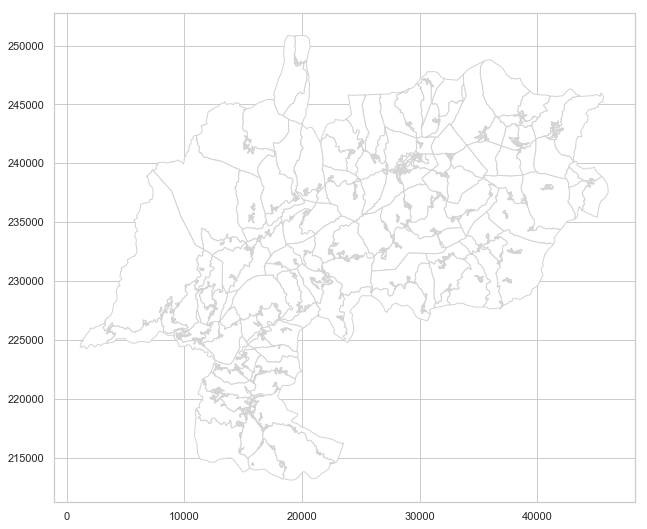

In [68]:
ax0 = map_df.plot(color='white', edgecolor='lightgrey', figsize=(11,9))

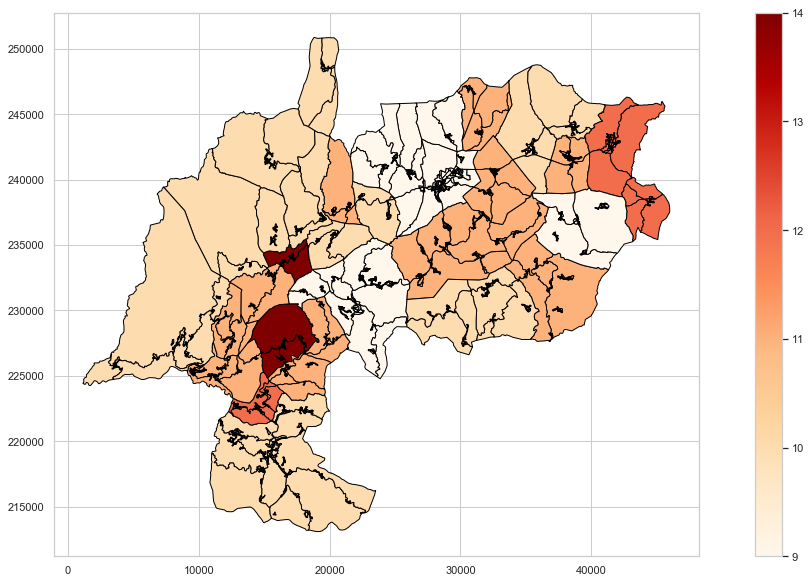

In [46]:
map_df.plot(column='IV', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

In [50]:
%matplotlib inline

In [70]:
shp_path = "/Users/dvf/Documents/BGRI2011_1706/BGRI2011_1706.shp"
#alterar encoding para ISO-8859-1
sf = shp.Reader(shp_path, encoding = "ISO-8859-1")

In [33]:
df = read_shapefile(sf)
df.shape

(1417, 8)

### Adding locations 

In [209]:
import pandas as pd
import folium


folium_map = folium.Map(location=[41.785061, -7.781880],
                        zoom_start=10,
                        tiles="CartoDB dark_matter")

folium.CircleMarker(location=[41.714849, -8.034901],color='pink', radius=3).add_to(folium_map)#Centro Social e Paroquial de Cabril
folium.CircleMarker(location=[41.855523, -7.633986],color='red', radius=1).add_to(folium_map) #Centro Social e Paroquial de Vilar de Perdizes
folium.CircleMarker(location=[41.798622, -7.666606],color='grey', radius=3.7).add_to(folium_map) #Lar Monte Sereno
folium.CircleMarker(location=[41.641292, -7.945080],color='yellow', radius=3).add_to(folium_map) #Lar Nossa Senhora do Pranto
folium.CircleMarker(location=[41.737331, -7.869785],color='orange', radius=2.2).add_to(folium_map) #Lar dos Pisões para Seniores
folium.CircleMarker(location=[41.822516, -7.790499],color='green', radius=8).add_to(folium_map) #Santa Casa da Misericórdia - Lar
folium.CircleMarker(location=[41.785061, -7.781880],color='blue', radius=3.6).add_to(folium_map) #Residencial Santa Clara


folium_map